<a href="https://colab.research.google.com/github/JoelAbadi/DI-Bootcamp/blob/main/daily_challnege_W8_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()


Saving Global_Terrorism_Database.zip to Global_Terrorism_Database.zip


In [9]:
import zipfile
import os

# Define file paths
zip_path = '/content/Global_Terrorism_Database.zip'  # Corrected filename
extract_path = '/content/Global_Terrorism_Database'

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Unzipped successfully!")

 Unzipped successfully!


In [11]:
for file in os.listdir(extract_path):
    print(file)


Global Terrorism Database


In [12]:
nested_path = extract_path + '/Global Terrorism Database'

for file in os.listdir(nested_path):
    print(file)



Global Terrorism Database


In [13]:
deep_path = nested_path + '/Global Terrorism Database'

for file in os.listdir(deep_path):
    print(file)


globalterrorismdb_0718dist.csv


In [15]:
import pandas as pd

csv_path = '/content/Global_Terrorism_Database/Global Terrorism Database/Global Terrorism Database/globalterrorismdb_0718dist.csv'

df = pd.read_csv(csv_path, encoding='ISO-8859-1')

print(" Dataset loaded successfully")
print("Shape:", df.shape)
print("Columns:", df.columns[:10].tolist())
df.info()


/tmp/ipython-input-15-2727295325.py:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding='ISO-8859-1')


 Dataset loaded successfully
Shape: (181691, 135)
Columns: ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [16]:
df.dropna(axis=1, how='all', inplace=True)

df['nkill'].fillna(0, inplace=True)
df['nwound'].fillna(0, inplace=True)

df.dropna(subset=['eventid', 'country_txt'], inplace=True)

print(" Basic cleaning complete")


 Basic cleaning complete


/tmp/ipython-input-16-2152316429.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nkill'].fillna(0, inplace=True)
/tmp/ipython-input-16-2152316429.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [17]:
categorical_cols = ['attacktype1_txt', 'targtype1_txt', 'weaptype1_txt']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("One-hot encoding done")


One-hot encoding done


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[['nkill_norm', 'nwound_norm']] = scaler.fit_transform(df_encoded[['nkill', 'nwound']])

print(" Normalization complete")


 Normalization complete


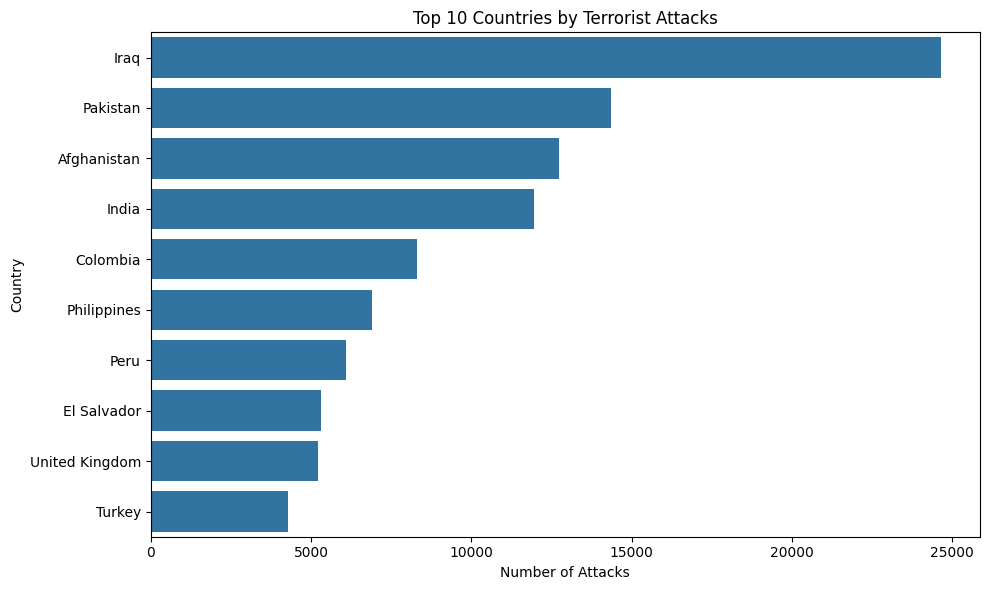

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df['country_txt'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Terrorist Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


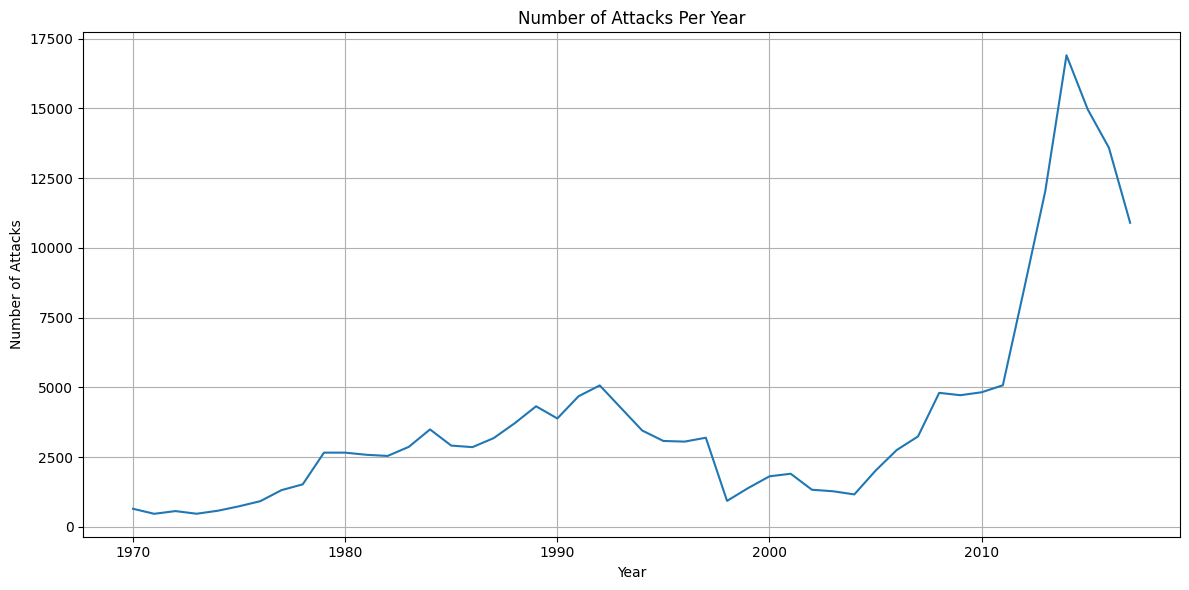

In [20]:
attacks_per_year = df['iyear'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title("Number of Attacks Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
df['imonth'] = df['imonth'].replace(0, 1)
df['iday'] = df['iday'].replace(0, 1)

df_date_components = df[['iyear', 'imonth', 'iday']].rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'})


df['date'] = pd.to_datetime(df_date_components)

print(" Date column created")

 Date column created


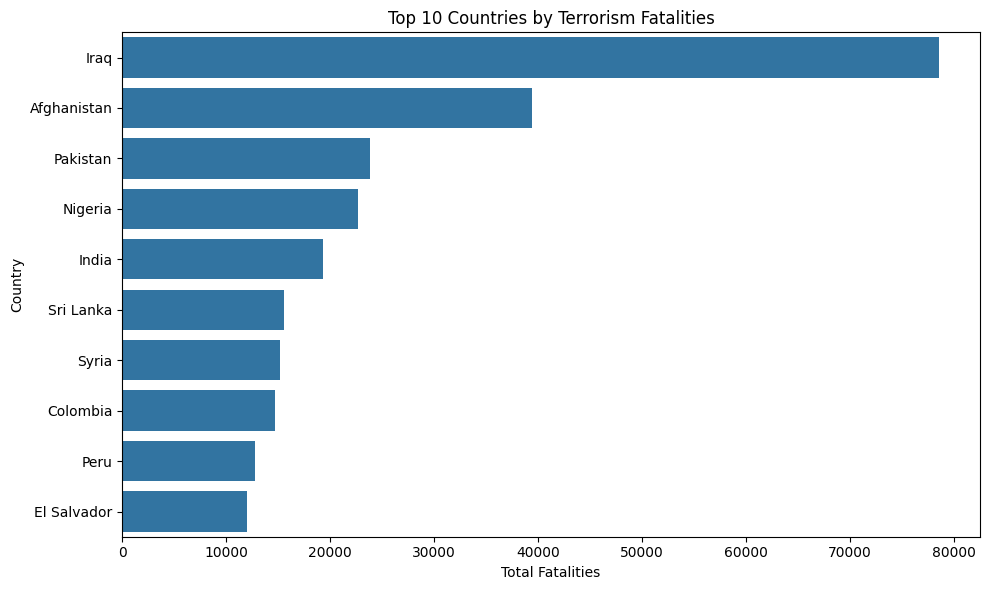

In [23]:
top_deaths = df.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_deaths.values, y=top_deaths.index)
plt.title("Top 10 Countries by Terrorism Fatalities")
plt.xlabel("Total Fatalities")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


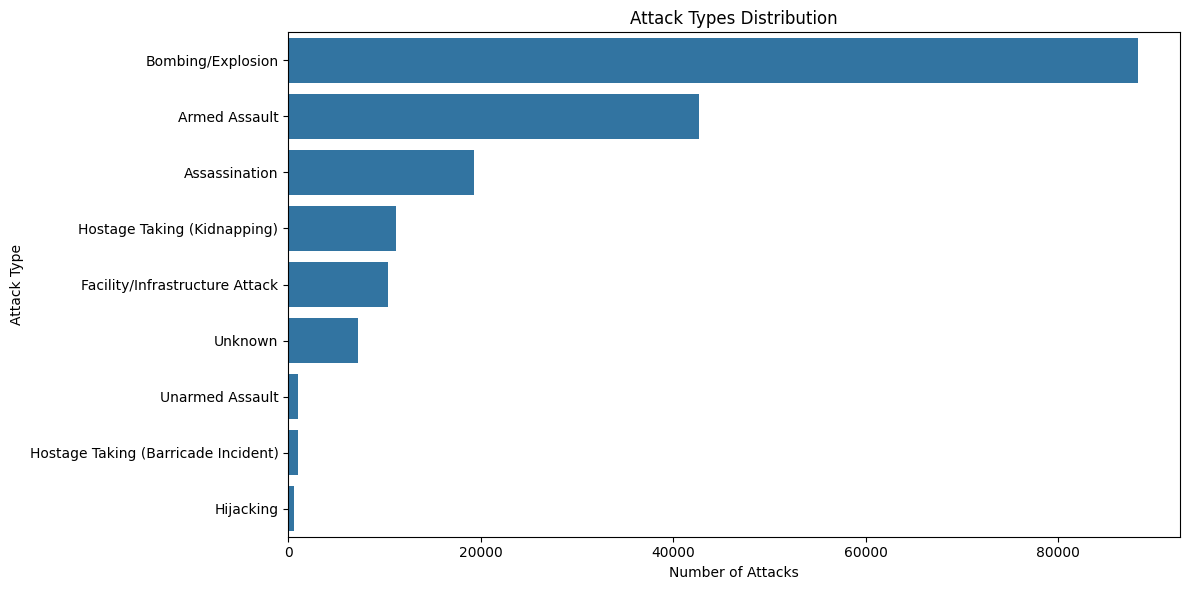

In [25]:
attack_types = df['attacktype1_txt'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=attack_types.values, y=attack_types.index)
plt.title("Attack Types Distribution")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Type")
plt.tight_layout()
plt.show()


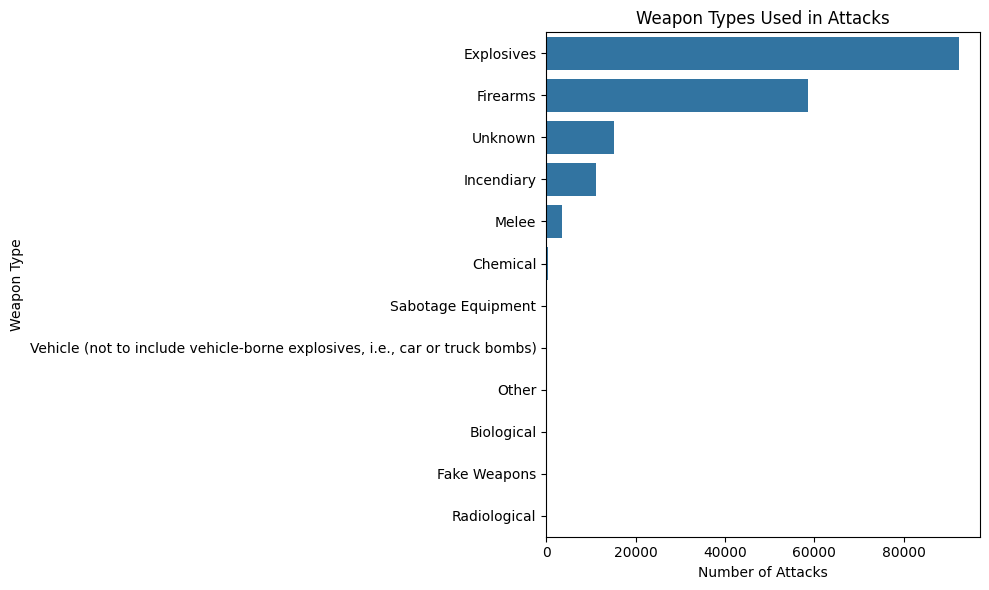

In [26]:
weapon_types = df['weaptype1_txt'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=weapon_types.values, y=weapon_types.index)
plt.title("Weapon Types Used in Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Weapon Type")
plt.tight_layout()
plt.show()
